In [1]:
import csv
import math as m
l1 = 50
l2 = 40
l3 = 20
with open('datarobot2.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['tt1','tt2','tt3','Px', 'Py','phi'])

    for tt1 in range (-180 , 180,2):
        for tt2 in range (-180, 180,2):
            for tt3 in range (-180,180,2):
                tt1 = (tt1*m.pi)/180
                tt2 = (tt2*m.pi)/180
                tt3 = (tt3*m.pi)/180
                Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2) + l3*m.cos(tt1 + tt2 + tt3)
                Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2) + l3*m.sin(tt1 + tt2 + tt3)
                phi = tt1 + tt2 + tt3
                writer.writerow([tt1,tt2,tt3,Px,Py,phi])

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))

model.add(Dense(100,activation='relu'))


model.add(Dense(50,activation='relu'))

model.add(Dense(3,activation='Softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                                 
Total params: 58,039
Trainable params: 58,039
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
data = pd.read_csv('datarobot2.csv')

y = data.drop(data.columns[3:],axis = 1)
x = data[['Px','Py']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=7)
x_train

,Px,Py
544022,101.183858,-16.580751
2347139,100.598385,16.960962
2378986,106.960962,10.598385
5582706,70.437048,-4.158234
5367950,71.206148,6.840403
...,...,...
3905091,70.978870,6.180340
2632182,87.909431,-19.890438
2671129,105.760215,12.313230
3335364,83.819660,19.021130


In [4]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=1,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

36450/36450 [==============================] - 154s 4ms/step - loss: 0.8415 - accuracy: 0.7339 - val_loss: 0.8400 - val_accuracy: 0.9360


In [5]:
model.evaluate(x_test, y_test)

36450/36450 [==============================] - 70s 2ms/step - loss: 0.8400 - accuracy: 0.9360


[0.8400434851646423, 0.9359996318817139]

In [6]:
model.save("robot3bac.h5")

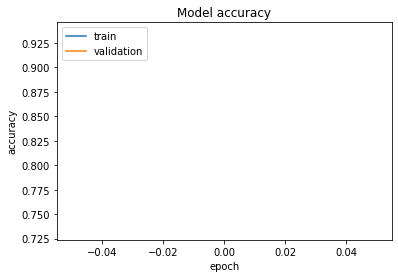

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")